In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset

Dataset details:
- target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

source: https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis/data

In [2]:
filename = 'data/sentiment140.80000.processed.noemoticon.csv'

df = pd.read_csv(filename, index_col=0)

In [3]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Remove stop-words (NLTK)

In [4]:
import re

# !pip install nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

In [5]:
# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [6]:
nltk.download('stopwords', download_dir='data')

[nltk_data] Downloading package stopwords to data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [8]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
# tip: parallelize with swifter
df.text = df.text.apply(lambda x: preprocess(x))

In [10]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,awww bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,dived many times ball managed save 50 rest go ...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,behaving mad see


In [11]:
df['text']

0             awww bummer shoulda got david carr third day
1        upset update facebook texting might cry result...
2        dived many times ball managed save 50 rest go ...
3                         whole body feels itchy like fire
4                                         behaving mad see
                               ...                        
79995                        wishing could see mom 2morrow
79996                                hurt feelings respond
79997    excited josh back erie hour wait till sunday a...
79998                plans going club dashed dressed coach
79999                                     hate car washing
Name: text, Length: 80000, dtype: object

# Build the WordCloud

In [12]:
#!pip install wordcloud
from wordcloud import WordCloud

In [13]:
# convert all the texts to a single text
all_text = ' '.join(df['text'].to_list())

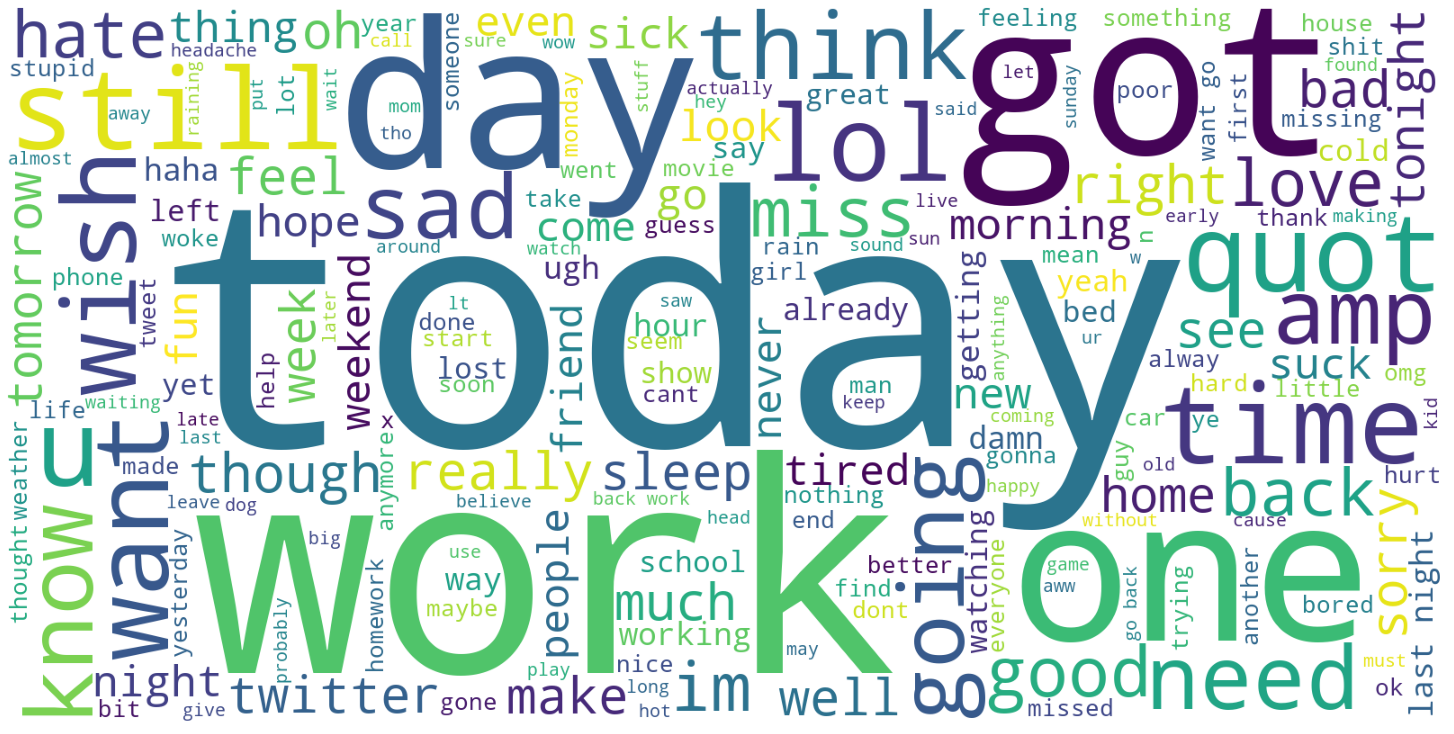

In [14]:
# Construction of word map
wordcloud = WordCloud(width=1600, height=800, 
                      background_color='white').generate(all_text)

# plot the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
# Check the words by occurrence
wordcloud.words_

{'today': 1.0,
 'work': 0.9085923217550275,
 'got': 0.7760511882998172,
 'day': 0.7074954296160878,
 'one': 0.6858622790981109,
 'still': 0.6852528945764778,
 'time': 0.6687995124923827,
 'quot': 0.65569774527727,
 'u': 0.6276660572821451,
 'lol': 0.6060329067641682,
 'want': 0.5862279098110909,
 'wish': 0.5706886045094455,
 'think': 0.5661182205971969,
 'know': 0.5658135283363802,
 'amp': 0.5572821450335161,
 'going': 0.5432663010359536,
 'sad': 0.5286410725167581,
 'need': 0.5182815356489945,
 'good': 0.5109689213893968,
 'miss': 0.5091407678244972,
 'im': 0.48476538695917126,
 'love': 0.44972577696526506,
 'hate': 0.44393662400975015,
 'back': 0.4405850091407678,
 'though': 0.42748324192565507,
 'right': 0.4183424741011578,
 'really': 0.41042047531992687,
 'bad': 0.3942717854966484,
 'much': 0.39366240097501526,
 'sorry': 0.3857404021937843,
 'twitter': 0.37995124923826934,
 'feel': 0.3793418647166362,
 'sleep': 0.37873248019500305,
 'see': 0.3778184034125533,
 'oh': 0.3775137111517

In [16]:
save_image_fn = "images/wordcloud.png"

# save the image in the img folder
wordcloud.to_file(save_image_fn)

# Remove new words (stop words)

by default the wordcloud use the build-in STOPWORDS list, so you need to update that list

In [17]:
from wordcloud import STOPWORDS

new_stopwords = ['today','work','got','day','one','still']

stopwords = set(STOPWORDS)
stopwords.update(new_stopwords)

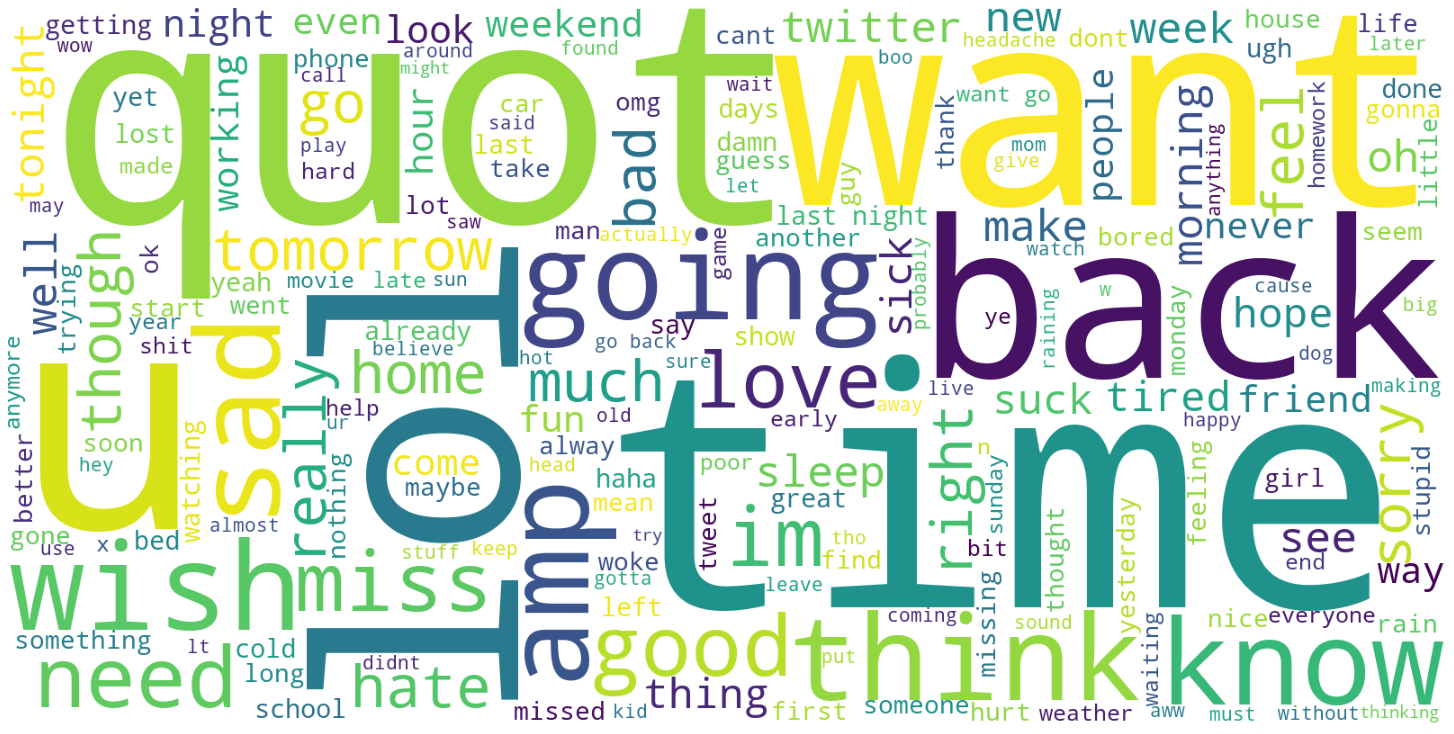

In [18]:
# Construction of word map
wordcloud = WordCloud(width=1600, height=800, 
                      background_color='white',
                      stopwords=stopwords).generate(all_text)

# plot the word cloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Create a shape for word cloud

Reference for flags mask: https://www.datacamp.com/community/tutorials/wordcloud-python

In [19]:
from PIL import Image
from wordcloud import ImageColorGenerator

In [20]:
mask_filename = 'images/flag_of_brazil.png'

mask = np.array(Image.open(mask_filename))

In [21]:
# Construction of word map
brazil_wordcloud = WordCloud(width=1600, height=800, 
                             background_color='white',
                             stopwords=stopwords, mode="RGBA",
                             mask=mask).generate(all_text)

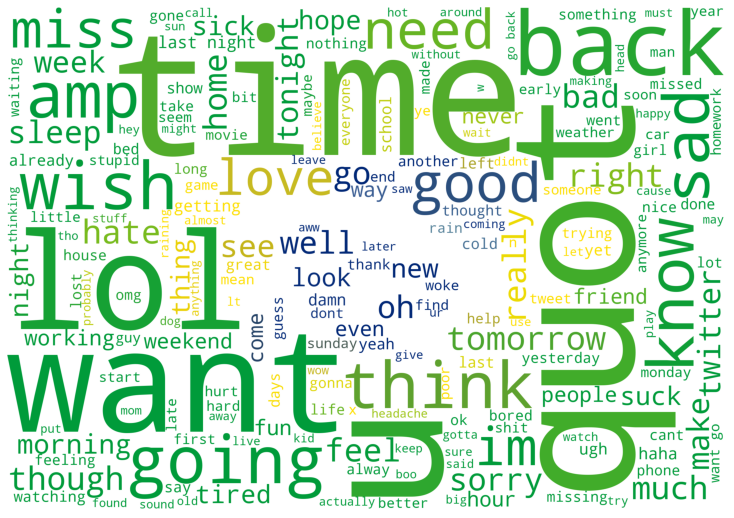

In [22]:
image_colors = ImageColorGenerator(mask)

# plot the word cloud
plt.figure(figsize=(10,10))
plt.imshow(brazil_wordcloud.recolor(color_func=image_colors))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
save_image_fn = "images/brazil_wordcloud.png"

# save the image in the img folder
brazil_wordcloud.to_file(save_image_fn)

In [24]:
# next step: remove verbs, numerals, conjunctions and prepositions